In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

In [360]:
# load the dataset
df = pd.read_csv('C:\\xampp\\htdocs\\git\\MobilePhonePricePrediction\\Data\\Clean\\cleaned_cellphone.csv')
df.head()

,price,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,price_range
0,2357,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,Mid
1,1749,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,Mid
2,1916,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,Mid
3,1315,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,Low
4,2137,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,Mid


In [361]:
# drop price column for features and set it as target variable
x = df.drop(['price', 'price_range'], axis=1) # price not used as feature
y = df['price'] #y as output

In [362]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [363]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBRegressor()
}

In [364]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} - R2: {r2:.4f}, RMSE: {rmse:.2f}")


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - R2: 0.4382, RMSE: 454.77
Gradient Boosting - R2: 0.6678, RMSE: 349.73
XGBoost - R2: 0.6708, RMSE: 348.11


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


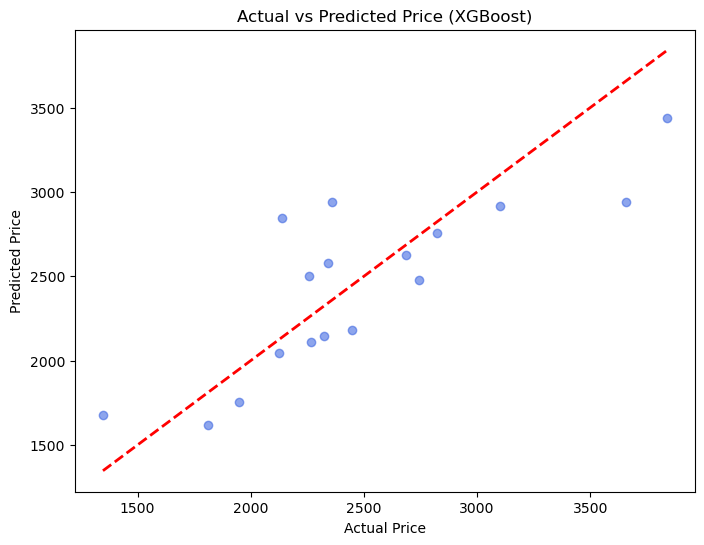

In [365]:
# Visualize the results for XGBoost because it's r squared score is the highest
y_pred_xgb = models['XGBoost'].predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (XGBoost)")
plt.show()


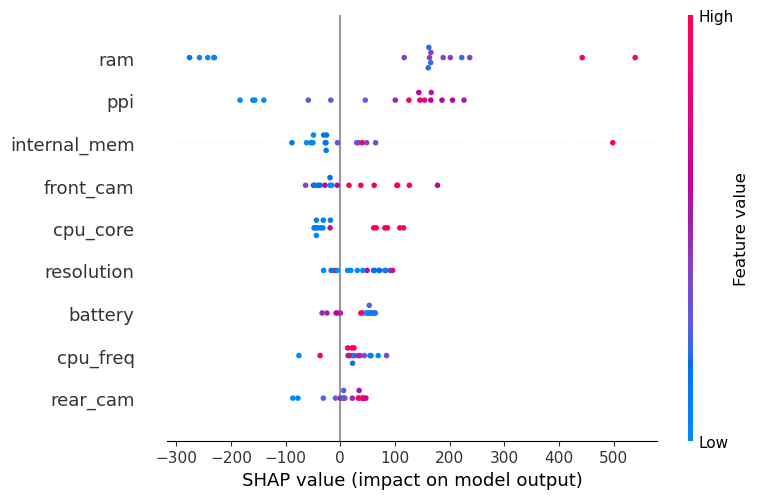

In [366]:
# Using SHAP to explain the predictions of the XGBoost model
explainer = shap.Explainer(models['XGBoost'], x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)


In [373]:
# Tuning the XGBoost model
best_xgb = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

best_xgb.fit(x_train, y_train)
y_pred_best = best_xgb.predict(x_test)

r2 = r2_score(y_test, y_pred_best)
rmse = mean_squared_error(y_test, y_pred_best, squared=False)

print(f"Optimized XGBoost - R2: {r2:.4f}, RMSE: {rmse:.2f}")


Optimized XGBoost - R2: 0.7410, RMSE: 308.80


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


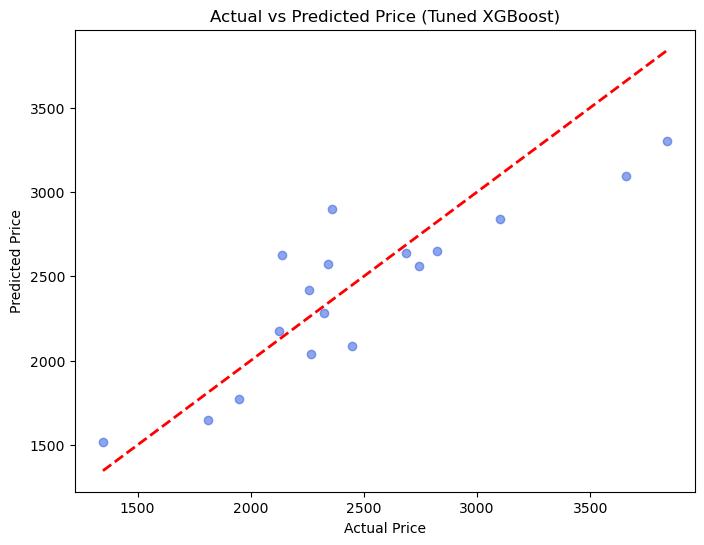

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Tuned XGBoost)")
plt.show()

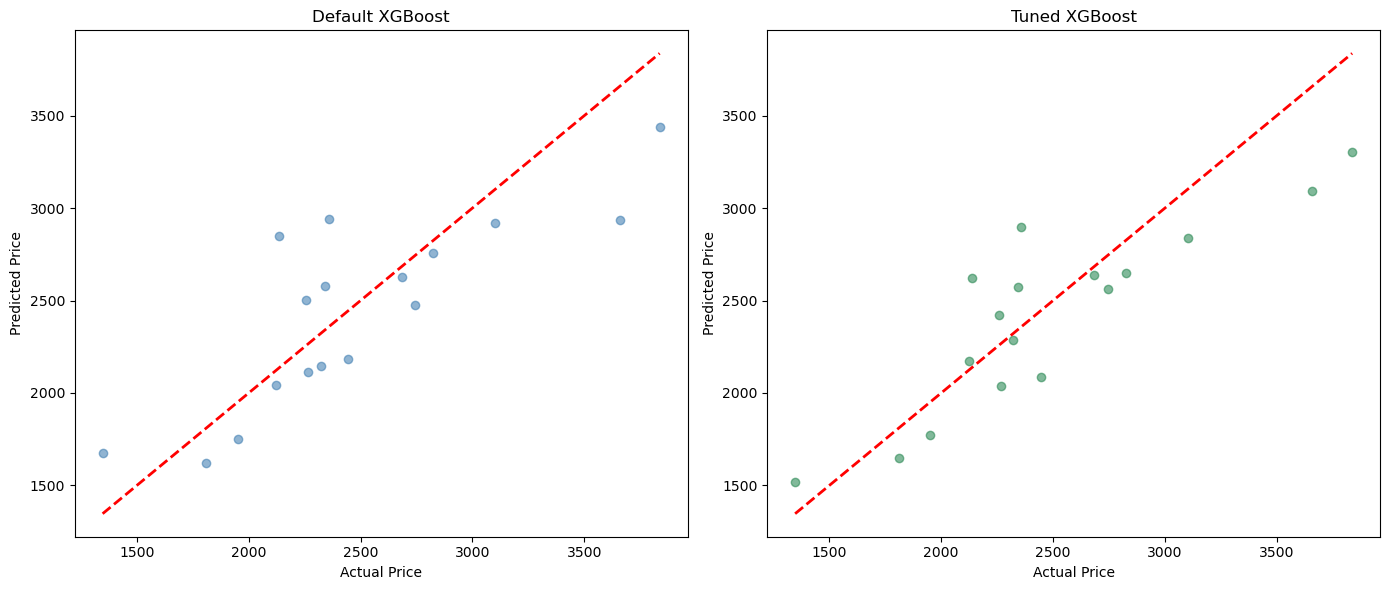

In [375]:
# Visualizing the performance of the default and tuned XGBoost models
y_pred_default = models['XGBoost'].predict(x_test)
y_pred_best = best_xgb.predict(x_test)

plt.figure(figsize=(14, 6))

# Subplot 1: Default
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_default, color='steelblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Default XGBoost")

# Subplot 2: Tuned
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_best, color='seagreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Tuned XGBoost")

plt.tight_layout()
plt.show()
